## Estatísticas de Transações Pix

Estudo sobre as estatísticas de transações Pix da API do Banco Central (BCB) acerca do volume financeiro e da quantidade de transações Pix liquidadas mensalmente, incluindo informações sobre o Sistema de Pagamentos Instantâneos (SPI) e transações fora do SPI.

Instrumento de periodicidade **mensal**, com atualização disponibilizada pelo Banco Central do Brasil.

Inclui:

- Quantidade e valor financeiro de transações Pix liquidadas no SPI.
- Recortes por tipo de pessoa (PF/PJ), região, idade, forma de iniciação, natureza e finalidade da transação.

### Parâmetros da API

| Nome       | Tipo    | Título     | Descrição |
|------------|---------|------------|-----------|
| Database   | texto   | Data-base  | Data-base de referência no formato AAAAMM |
| $format    | texto   | $format    | Tipo de conteúdo que será retornado |
| $select    | texto   | $select    | Propriedades que serão retornadas |
| $filter    | texto   | $filter    | Filtro de seleção de entidades. e.g. Nome eq 'João'. [Clique aqui](https://olinda.bcb.gov.br/olinda/servico/ajuda) para ver as opções de operadores e funções. |
| $orderby   | texto   | $orderby   | Propriedades para ordenação das entidades. e.g. Nome asc, Idade desc |
| $skip      | inteiro | $skip      | Índice (maior ou igual a zero) da primeira entidade que será retornada |
| $top       | inteiro | $top       | Número máximo (maior que zero) de entidades que serão retornadas |

---

### Dicionário de Dados

| Nome         | Tipo    | Título                             | Descrição |
|--------------|---------|------------------------------------|-----------|
| AnoMes       | inteiro | Data-base - ano/mês                | Data-base de referência no formato AAAAMM |
| PAG_PFPJ     | texto   | Tipo de Pessoa do Pagador          | PF = Pessoa Física, PJ = Pessoa Jurídica |
| REC_PFPJ     | texto   | Tipo de Pessoa do Recebedor        | PF = Pessoa Física, PJ = Pessoa Jurídica |
| PAG_REGIAO   | texto   | Região do Pagador                  | Região do domicílio do pagador |
| REC_REGIAO   | texto   | Região do Recebedor                | Região do domicílio do recebedor |
| PAG_IDADE    | texto   | Idade do Pagador                   | Faixa etária do usuário pagador |
| REC_IDADE    | texto   | Idade do Recebedor                 | Faixa etária do usuário recebedor |
| FORMAINICIACAO | texto | Forma de Iniciação da Transação    | INIC = Iniciador com dados do recebedor, QRES = QR Code Estático, QRDN = QR Code Dinâmico, MANU = Inserção manual, DICT = Chave Pix |
| NATUREZA     | texto   | Natureza da Transação              | P2P = Pessoa para Pessoa, B2B = Empresa para Empresa, P2B = Pessoa para Empresa, B2P = Empresa para Pessoa, P2G = Pessoa para Governo, B2G = Empresa para Governo |
| FINALIDADE   | texto   | Finalidade da Transação            | Transferência, saque ou troco |
| VALOR        | decimal | Valor das Transações Pix           | Volume financeiro (R$ milhões) de transações Pix liquidadas mensalmente |
| QUANTIDADE   | decimal | Quantidade Total de Transações Pix | Quantidade (milhares) de transações Pix liquidadas mensalmente |

---

**Fontes:** 
- [BCB - Transação Pix](https://dadosabertos.bcb.gov.br/dataset/pix/resource/9eb0f16d-4a38-4936-be2a-6c0dd18f87f7?inner_span=True)
- [BCB - Estatísticas Pix](https://dadosabertos.bcb.gov.br/dataset/pix)


In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect('src/datasets/dadosPix.db')
query = "select * from transacoes_pix"
df = pd.read_sql(query, con)
con.close()

Primeiro vamos explorar a estrutura do conjunto de dados

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnoMes          100 non-null    object 
 1   PAG_PFPJ        100 non-null    object 
 2   REC_PFPJ        100 non-null    object 
 3   PAG_REGIAO      100 non-null    object 
 4   REC_REGIAO      100 non-null    object 
 5   PAG_IDADE       100 non-null    object 
 6   REC_IDADE       100 non-null    object 
 7   FORMAINICIACAO  100 non-null    object 
 8   NATUREZA        100 non-null    object 
 9   FINALIDADE      100 non-null    object 
 10  VALOR           100 non-null    float64
 11  QUANTIDADE      100 non-null    int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 9.5+ KB


Aparentemente não temos dados, faltantes, mas vamos comprovar:

In [3]:
df.isnull().sum()

AnoMes            0
PAG_PFPJ          0
REC_PFPJ          0
PAG_REGIAO        0
REC_REGIAO        0
PAG_IDADE         0
REC_IDADE         0
FORMAINICIACAO    0
NATUREZA          0
FINALIDADE        0
VALOR             0
QUANTIDADE        0
dtype: int64

Note que AnoMes está como object (string), mas seria mais interessante estar como Date. Vejamos:

In [4]:
type(df['AnoMes'][0])

str

Convertendo para 'date'.

In [8]:
df['AnoMes'] = pd.to_datetime(df['AnoMes'])
df['AnoMes'] = df['AnoMes'].dt.date

Verificando a conversão para conter apenas a data, sem horário.

In [9]:
type(df['AnoMes'][0])

datetime.date

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnoMes          100 non-null    object 
 1   PAG_PFPJ        100 non-null    object 
 2   REC_PFPJ        100 non-null    object 
 3   PAG_REGIAO      100 non-null    object 
 4   REC_REGIAO      100 non-null    object 
 5   PAG_IDADE       100 non-null    object 
 6   REC_IDADE       100 non-null    object 
 7   FORMAINICIACAO  100 non-null    object 
 8   NATUREZA        100 non-null    object 
 9   FINALIDADE      100 non-null    object 
 10  VALOR           100 non-null    float64
 11  QUANTIDADE      100 non-null    int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 9.5+ KB


Ajustando a coluna que está em milhões.

In [12]:
monetary_columns = ['VALOR']
for col in monetary_columns:
    df[col] = df[col] * 1_000_000
    df[col] = df[col].round(2)

In [13]:
df

,AnoMes,PAG_PFPJ,REC_PFPJ,PAG_REGIAO,REC_REGIAO,PAG_IDADE,REC_IDADE,FORMAINICIACAO,NATUREZA,FINALIDADE,VALOR,QUANTIDADE
0,2025-01-01,PF,PF,CENTRO-OESTE,SUDESTE,entre 30 e 39 anos,entre 50 e 59 anos,QRES,P2P,Pix,1.765604e+12,30585
1,2025-01-01,PF,PF,Nao informado,Nao informado,até 19 anos,entre 30 e 39 anos,MANU,P2P,Pix,3.268242e+10,388
2,2025-01-01,PF,PF,SUDESTE,SUL,entre 50 e 59 anos,entre 40 e 49 anos,MANU,P2P,Pix,1.097083e+13,25569
3,2025-01-01,PJ,PF,Nao informado,SUDESTE,Nao se aplica,até 19 anos,QRES,B2P,Pix,7.578677e+10,991
4,2025-01-01,PF,PF,NORDESTE,SUDESTE,Nao informado,entre 40 e 49 anos,MANU,P2P,Pix,4.915000e+08,6
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-01-01,PF,PF,NORDESTE,NORDESTE,mais de 60 anos,entre 50 e 59 anos,Nao disponivel,P2P,Nao disponivel,8.950206e+11,2797
96,2025-01-01,PF,PF,SUDESTE,CENTRO-OESTE,entre 20 e 29 anos,entre 20 e 29 anos,QRDN,P2P,Pix,1.344287e+12,25794
97,2025-01-01,PF,PF,CENTRO-OESTE,SUL,entre 30 e 39 anos,entre 50 e 59 anos,DICT,P2P,Pix,1.981537e+13,45540
98,2025-01-01,PF,PF,NORTE,Nao informado,até 19 anos,entre 40 e 49 anos,MANU,P2P,Pix,4.027979e+10,396


Ajustando as colunas que estão em milhares.

In [14]:
thousand_columns = ['QUANTIDADE']
for col in thousand_columns:
    df[col] = df[col] * 1_000

In [15]:
df

,AnoMes,PAG_PFPJ,REC_PFPJ,PAG_REGIAO,REC_REGIAO,PAG_IDADE,REC_IDADE,FORMAINICIACAO,NATUREZA,FINALIDADE,VALOR,QUANTIDADE
0,2025-01-01,PF,PF,CENTRO-OESTE,SUDESTE,entre 30 e 39 anos,entre 50 e 59 anos,QRES,P2P,Pix,1.765604e+12,30585000
1,2025-01-01,PF,PF,Nao informado,Nao informado,até 19 anos,entre 30 e 39 anos,MANU,P2P,Pix,3.268242e+10,388000
2,2025-01-01,PF,PF,SUDESTE,SUL,entre 50 e 59 anos,entre 40 e 49 anos,MANU,P2P,Pix,1.097083e+13,25569000
3,2025-01-01,PJ,PF,Nao informado,SUDESTE,Nao se aplica,até 19 anos,QRES,B2P,Pix,7.578677e+10,991000
4,2025-01-01,PF,PF,NORDESTE,SUDESTE,Nao informado,entre 40 e 49 anos,MANU,P2P,Pix,4.915000e+08,6000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-01-01,PF,PF,NORDESTE,NORDESTE,mais de 60 anos,entre 50 e 59 anos,Nao disponivel,P2P,Nao disponivel,8.950206e+11,2797000
96,2025-01-01,PF,PF,SUDESTE,CENTRO-OESTE,entre 20 e 29 anos,entre 20 e 29 anos,QRDN,P2P,Pix,1.344287e+12,25794000
97,2025-01-01,PF,PF,CENTRO-OESTE,SUL,entre 30 e 39 anos,entre 50 e 59 anos,DICT,P2P,Pix,1.981537e+13,45540000
98,2025-01-01,PF,PF,NORTE,Nao informado,até 19 anos,entre 40 e 49 anos,MANU,P2P,Pix,4.027979e+10,396000


## Estatísticas Descritivas

Nosso conjunto de dados está com algumas colunas que não farão parte da nossa análise. 

Daremos foco na região e idade de pagadores e recebedores; e nos valores e quantidades de Pix.

In [19]:
date_col = ['AnoMes']

users_cols = ['PAG_PFPJ', 'REC_PFPJ', 'PAG_REGIAO', 'REC_REGIAO', 'PAG_IDADE', 'REC_IDADE']

pix_cols = ['VALOR', 'QUANTIDADE']

selected_cols = date_col+users_cols+pix_cols
df_pix = df[selected_cols].copy()

In [21]:
df_pix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AnoMes      100 non-null    object 
 1   PAG_PFPJ    100 non-null    object 
 2   REC_PFPJ    100 non-null    object 
 3   PAG_REGIAO  100 non-null    object 
 4   REC_REGIAO  100 non-null    object 
 5   PAG_IDADE   100 non-null    object 
 6   REC_IDADE   100 non-null    object 
 7   VALOR       100 non-null    float64
 8   QUANTIDADE  100 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [22]:
df_pix.describe()

,VALOR,QUANTIDADE
count,1.000000e+02,1.000000e+02
mean,5.187608e+13,3.783380e+08
std,1.991876e+14,2.026305e+09
min,1.000000e+07,1.000000e+03
25%,1.302281e+10,6.500000e+04
50%,1.786927e+11,1.122000e+06
75%,2.130300e+12,1.783050e+07
max,1.066168e+15,1.916598e+10


## Estudo das Médias

Existem formas diferentes de encontrar as médias em questão, como por exemplo:

In [ ]:
soma1 = df_pix['VALOR'].sum()
soma2 = df_pix['QUANTIDADE'].sum()

soma1/soma2

np.float64(137115.67861440318)

In [24]:
(df_pix['VALOR'] / df_pix['QUANTIDADE']).mean()

np.float64(347569.2381189891)

## Diferença entre Média Ponderada e Média Simples (em um único mês)

Mesmo ao considerar apenas um **único mês**, podemos observar uma grande diferença entre as duas abordagens de média:

- `soma1 / soma2`:  
  $$ \frac{\sum \text{VALOR}}{\sum \text{QUANTIDADE}} $$
  Representa a **média ponderada** por quantidade de transações — ou seja, cada transação contribui proporcionalmente ao seu volume.

- `(df_pix['VALOR'] / df_pix['QUANTIDADE']).mean()`:  
  $$ \frac{1}{n} \sum_i \left( \frac{\text{VALOR}_i}{\text{QUANTIDADE}_i} \right) $$
  Representa a **média simples** das razões linha a linha, onde cada linha tem **peso igual**, independentemente do volume da transação.

### Por que a diferença é tão grande?

Mesmo dentro de um único mês, os dados podem conter:

- Linhas com **quantidades muito pequenas** (ex: 1 ou 2), mas **valores altos**, o que resulta em razões muito grandes.  
- Linhas com **quantidades altas** (ex: milhares de transações) com valores mais proporcionais, que acabam tendo **pouca influência** na média simples, mas dominam a ponderada.

### Exemplo ilustrativo:

| VALOR | QUANTIDADE | VALOR/QUANTIDADE |
|-------|------------|------------------|
| 100   | 1          | 100              |
| 2000  | 100        | 20               |

- **Média simples**:  
  $ \frac{100 + 20}{2} = 60 $

- **Média ponderada**:  
  $ \frac{100 + 2000}{1 + 100} = \frac{2100}{101} \approx 20{,}79 $

> Portanto, a **média simples pode ser enviesada** por poucas linhas com quantidade muito baixa, enquanto a **média ponderada reflete melhor o comportamento geral do mês**.

### Conclusão

Use:

- **Média ponderada** (`sum(VALOR) / sum(QUANTIDADE)`) → quando o objetivo é obter o valor médio real das transações no período.
- **Média simples** (`(VALOR / QUANTIDADE).mean()`) → quando cada linha (e não cada transação) deve ter peso igual, o que nem sempre é desejável.



## Variância e Desvio-padrão

Pix

In [25]:
pix = df_pix['VALOR'] / df_pix['QUANTIDADE']
print ("Média:", pix.mean())
print ("Variância:", pix.var(ddof=0))
print ("Desvio Padrão:", pix.std(ddof=0))

Média: 347569.2381189891
Variância: 508751010855.09216
Desvio Padrão: 713267.8394930562


## Interpretação prática

### Alta dispersão nos valores

O **desvio-padrão** é aproximadamente **R$ 713 mil**, mais que o dobro da média de **R$ 347 mil**, resultando em um **coeficiente de variação de 205%**:

$$
\frac{713.267{,}84}{347.569{,}24} \approx 2{,}05
$$

Isso indica uma **variação muito acentuada** entre os registros, com algumas transações muito superiores à média puxando a variabilidade para cima.

---

### Intervalo de confiança típico

Supondo uma **distribuição simétrica** (o que é improvável aqui), cerca de **68% dos registros** estariam no intervalo:

$$
347.569{,}24 \pm 713.267{,}84 \Rightarrow [ -365.698{,}6 \;\text{até}\; 1.060.836{,}5 ]
$$

O fato de o **limite inferior ser negativo** (o que não faz sentido financeiramente) reforça que a distribuição é **assimétrica**, provavelmente com **forte viés positivo** (alguns valores extremamente altos).

---

### Possíveis causas da alta variabilidade

- **Mistura de perfis de usuários**:
  - *Pessoas físicas* geralmente realizam Pix de menor valor (transferências pessoais, pagamentos simples).
  - *Pessoas jurídicas*, por outro lado, podem fazer grandes transferências comerciais, folha de pagamento, fornecedores etc., com valores muito mais elevados.

- **Poucas transações com valores muito altos**:
  - Linhas com poucas transações e valores altos geram divisões que resultam em **médias inflacionadas**.

- **Presença de outliers e distribuição altamente enviesada**:
  - Transações fora do padrão distorcem os indicadores clássicos de tendência central.

---

### Uso da métrica

A **média simples (não ponderada)** é fortemente influenciada por **valores extremos**. Nesse contexto, pode não representar bem a realidade.

Para análises mais robustas, é recomendado:

- Utilizar **medianas** ou **boxplots** para observar a concentração dos dados;
- Aplicar **segmentações por tipo de cliente** (PF/PJ);
- Calcular **médias ponderadas**, em que cada transação “conta” igualmente.

---

## Conclusão

A análise das transações via Pix em **janeiro de 2025** mostra que a **presença simultânea de pessoas físicas e jurídicas** no mesmo conjunto de dados gera uma **dispersão extremamente alta** no valor médio por transação.

A **média simples** é insuficiente para descrever adequadamente o comportamento do conjunto — sendo essencial considerar a **estrutura heterogênea dos usuários** e utilizar **métricas mais resistentes à influência de outliers** para uma análise mais realista.


## Visualizações Gráficas

Para complementar o processo de análise de dados vamos gerar alguns gráficos, para isso usaremos a biblioteca 'matplotlib'.

**Histograma**
Mostra a distribuição de frequências de uma variável numérica dividida em “bins” (intervalos). Cada barra indica quantos valores caem em cada faixa. Use quando quiser entender a forma geral dos dados (simetria, sesgo, picôs múltiplos) e identificar aglomerados ou lacunas.

### Comparação de Ticket Médio entre Pessoa Física e Pessoa Jurídica


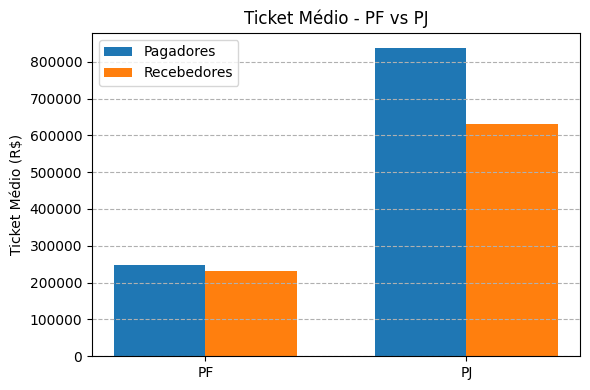

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular ticket médio
df_pix['TICKET_MEDIO'] = df_pix['VALOR'] / df_pix['QUANTIDADE']

pag_pf_pj = df_pix.groupby('PAG_PFPJ')['TICKET_MEDIO'].mean()
rec_pf_pj = df_pix.groupby('REC_PFPJ')['TICKET_MEDIO'].mean()

x = np.arange(len(pag_pf_pj.index))
width = 0.35

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x - width/2, pag_pf_pj.values, width, label='Pagadores')
ax.bar(x + width/2, rec_pf_pj.values, width, label='Recebedores')
ax.set_xticks(x)
ax.set_xticklabels(pag_pf_pj.index)
ax.set_ylabel('Ticket Médio (R$)')
ax.set_title('Ticket Médio - PF vs PJ')
ax.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


**Interpretação**: Pessoas Jurídicas (PJ) costumam apresentar tickets médios mais altos, o que pode estar ligado a atividades comerciais. Já as Pessoas Físicas (PF) tendem a realizar transferências menores e pessoais.


### Comparação de Ticket Médio por Região


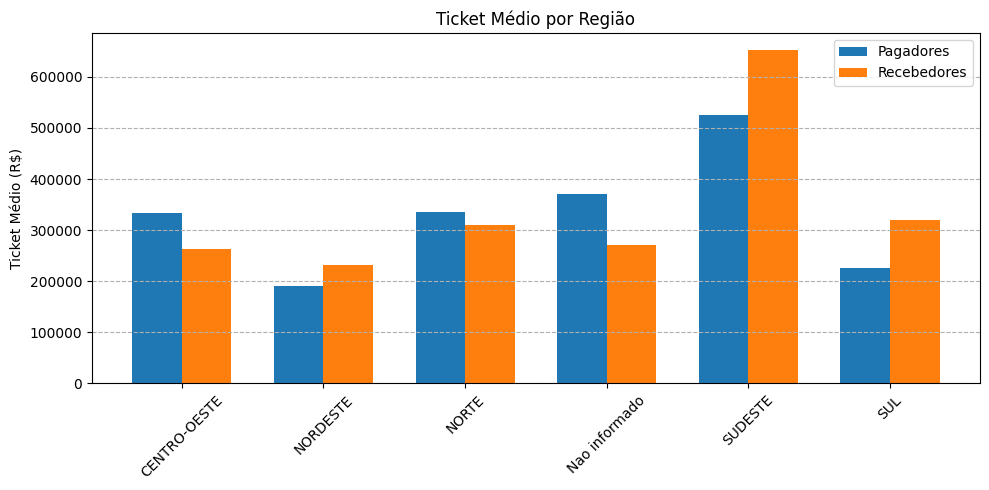

In [32]:
pag_reg = df_pix.groupby('PAG_REGIAO')['TICKET_MEDIO'].mean()
rec_reg = df_pix.groupby('REC_REGIAO')['TICKET_MEDIO'].mean()

x = np.arange(len(pag_reg.index))
width = 0.35

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - width/2, pag_reg.values, width, label='Pagadores')
ax.bar(x + width/2, rec_reg.values, width, label='Recebedores')
ax.set_xticks(x)
ax.set_xticklabels(pag_reg.index, rotation=45)
ax.set_ylabel('Ticket Médio (R$)')
ax.set_title('Ticket Médio por Região')
ax.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Interpretação**: Identifica regiões com maior poder de compra ou concentração de empresas. Diferenças grandes podem indicar polos comerciais ou variações de perfil dos usuários regionais, como é o caso da região sudeste.


### Comparação de Ticket Médio por Faixa Etária


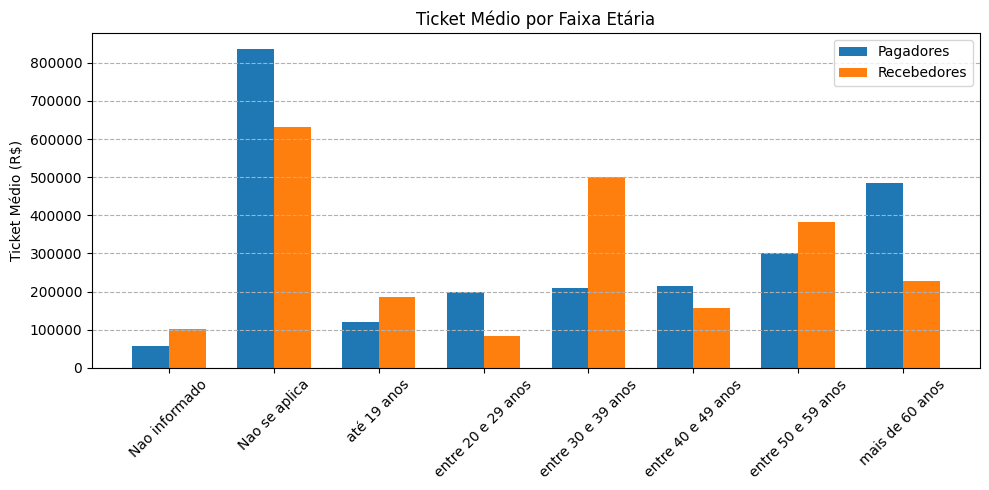

In [33]:
pag_idade = df_pix.groupby('PAG_IDADE')['TICKET_MEDIO'].mean()
rec_idade = df_pix.groupby('REC_IDADE')['TICKET_MEDIO'].mean()

x = np.arange(len(pag_idade.index))
width = 0.35

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - width/2, pag_idade.values, width, label='Pagadores')
ax.bar(x + width/2, rec_idade.values, width, label='Recebedores')
ax.set_xticks(x)
ax.set_xticklabels(pag_idade.index, rotation=45)
ax.set_ylabel('Ticket Médio (R$)')
ax.set_title('Ticket Médio por Faixa Etária')
ax.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


**Interpretação**: Faixas etárias mais jovens tendem a realizar transações menores, enquanto faixas intermediárias (30–60 anos) geralmente concentram os maiores valores, possivelmente por razões profissionais ou familiares.


### Boxplot do Ticket Médio Geral


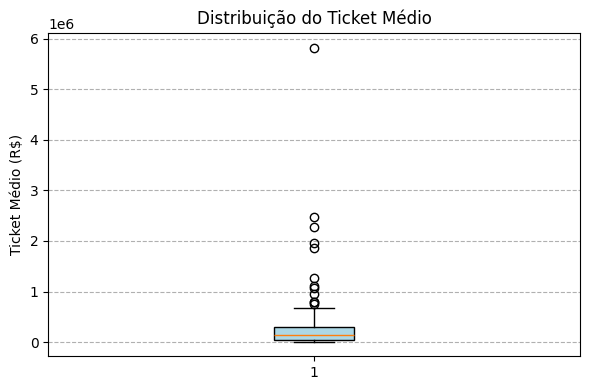

In [34]:
plt.figure(figsize=(6,4))
plt.boxplot(df_pix['TICKET_MEDIO'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribuição do Ticket Médio')
plt.ylabel('Ticket Médio (R$)')
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()


**Interpretação**: O boxplot mostra a dispersão dos tickets médios e a presença de outliers. Uma cauda longa superior pode indicar usuários com valores muito acima do típico.
